In [2]:

import sys
import pandas as pd
sys.path.append(r'..\src')
import numpy as np
from seqfold2_0 import fold_2
import time
import random
import matplotlib.pyplot as plt
import forgi.visual.mplotlib as fvm
from forgi.graph.bulge_graph import BulgeGraph
from seqfold import fold, dot_bracket
df2 = pd.read_csv(r'..\data\dna.csv')


In [ ]:

random.seed(23)

def generate_random_string(length):
    characters = 'ACTG'
    return ''.join(random.choice(characters) for _ in range(length))

# Example usage


times_fast =[]
energies_fast = []
times_original = []
energies_original = []


da =  {'Seq': [], 'time Seqfold': [], 'time Seqfold 2.0': [], 'Energy Seqfold': [] ,  'Energy Seqfold 2.0': []}
for length in [100, 200,300, 400 , 500, 600]:
    seq = generate_random_string(length)
  
    da['Seq'].append(seq)
    start_time = time.time()
    structs = fold_2(seq)
    #for s in structs:
     #   print(s.desc,s.ij,  s.e)
    da['time Seqfold 2.0'].append(time.time() - start_time )
    print(da['time Seqfold 2.0'][-1])
    ene=0
    for s in structs:
        ene+=s.e
    da['Energy Seqfold 2.0'].append(ene )
    print(ene)
    '''
    d_b = dot_bracket( seq, structs)
    bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
    fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
    plt.show()
    '''
    start_time = time.time()
    structs = fold(seq)
  
    da['time Seqfold'].append(time.time() - start_time )
    print(da['time Seqfold'][-1])
    ene = 0
    for s in structs:
        ene+=s.e
    da['Energy Seqfold'].append(ene )
    print(ene)
    '''
    d_b = dot_bracket( seq, structs)
    bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
    fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
    plt.show()
    '''
    
df = pd.DataFrame(da)

# Save the DataFrame to a CSV file
#df.to_csv('compariosn_seqfold2.csv', index=False)

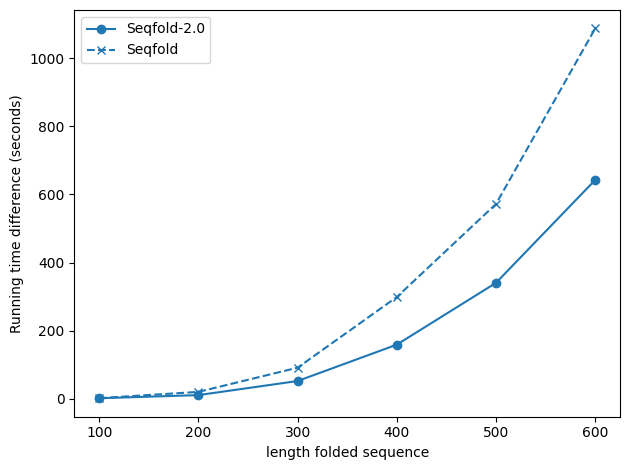

In [4]:
df = pd.read_csv(r'C:\Users\clima\Desktop\Aptamers\notebooks\compariosn_seqfold2.csv')
x = [100, 200, 300, 400, 500, 600]
plt.plot(x, df['time Seqfold 2.0'],label="Seqfold-2.0", linestyle='-', marker='o', color='#1f77b4')
#plt.scatter(x, df['time FastSeqfold'], color='#1f77b4')

plt.plot(x, df['time Seqfold'], label="Seqfold", linestyle='--', marker='x', color='#1f77b4')
#plt.scatter(x, df['time Seqfold'], color='#1f77b4')

plt.ylabel('Running time difference (seconds)')
plt.xlabel('length folded sequence')
plt.legend()
plt.tight_layout()
plt.savefig('running_time_difference.pdf')